In [ ]:
#Write a program to implement various low pass filters in the frequency domain.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2,ifft2,fftshift
import cv2

In [ ]:
%matplotlib inline

In [ ]:
np.random.seed(42)

image = np.random.random((256, 256))

In [ ]:
image = cv2.imread('img.jpg',0)
image_fft = fft2(image)

In [ ]:
image_fft = fft2(image)

In [ ]:
def ideal_lowpass_filter(image_shape, cutoff_frequency):
  rows, cols =image_shape
  center_row,  center_col = rows // 2, cols // 2
  filter_mask = np.zeros((rows, cols))


  for i in range(rows):
              for j in range(cols):
                   distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
                   if distance <= cutoff_frequency:
                                    filter_mask[i, j] = 1
  return filter_mask



In [ ]:

def butterworth_lowpass_filter(image_shape,cutoff_frequency, n):
    rows, cols =image_shape
    center_row,    center_col = rows // 2, cols // 2


    filter_mask = np.zeros((rows,cols))


    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            filter_mask[i, j] = 1 / (1 + (distance / cutoff_frequency)**(2*n))
    return filter_mask



In [ ]:
def gaussian_lowpass_filter(image_shape, cutoff_frequency):
    rows, cols = image_shape
    center_row,    center_col = rows // 2, cols // 2


    filter_mask =np.zeros((rows, cols))


    for i in range(rows):
        for j in range(cols):
            distance =np.sqrt((i - center_row)**2 + (j - center_col)**2)
            filter_mask[i, j] = np.exp(-0.5 * (distance / cutoff_frequency)**2)
    return filter_mask




In [ ]:
cutoff_frequency = 30
ideal_filter = ideal_lowpass_filter(image.shape, cutoff_frequency)
butterworth_filter = butterworth_lowpass_filter(image.shape, cutoff_frequency, n=2)
gaussian_filter = gaussian_lowpass_filter(image.shape, cutoff_frequency)
filtered_image_ideal = fftshift(image_fft) * ideal_filter
filtered_image_butterworth = fftshift(image_fft) * butterworth_filter
filtered_image_gaussian = fftshift(image_fft) * gaussian_filter

In [ ]:

filtered_image_ideal = np.abs(ifft2(filtered_image_ideal))


filtered_image_butterworth = np.abs(ifft2(filtered_image_butterworth))


filtered_image_gaussian =np.abs(ifft2(filtered_image_gaussian))

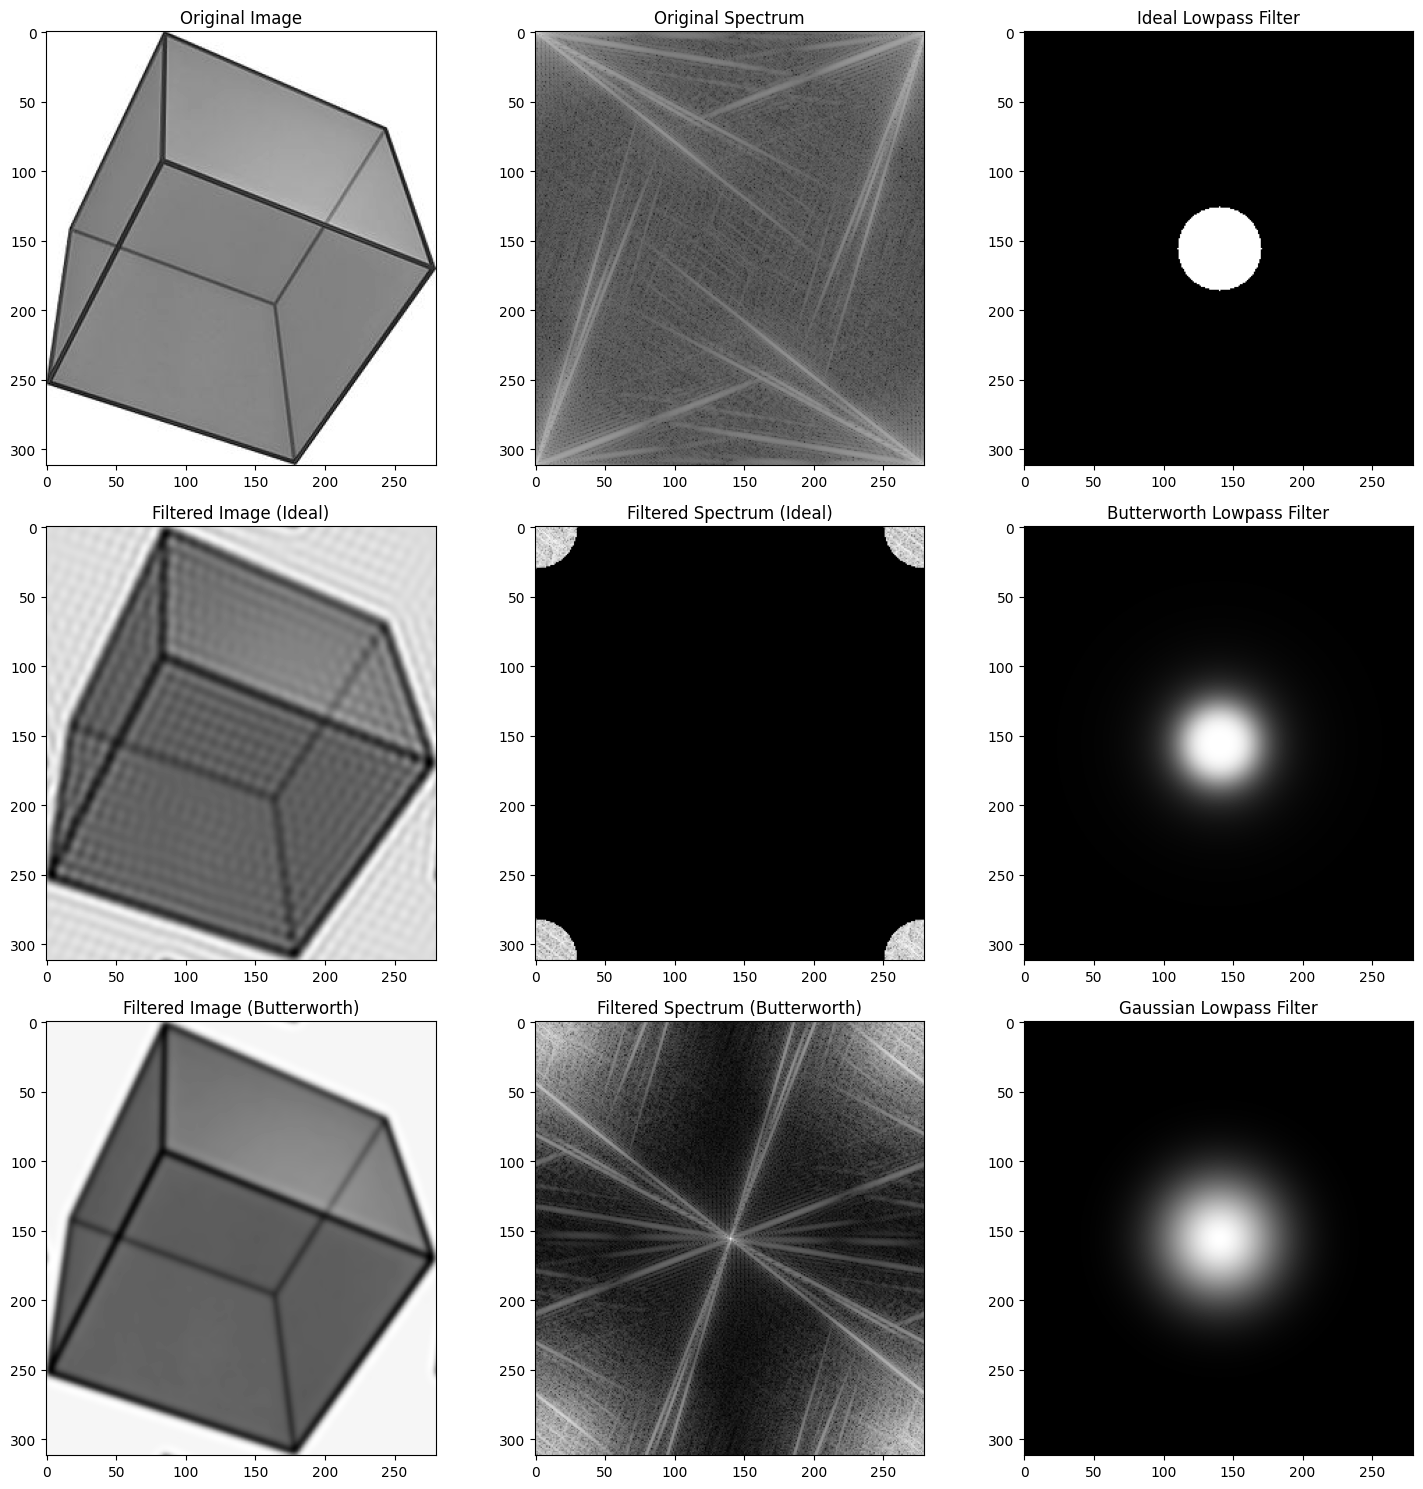

In [ ]:

plt.figure(figsize=(15, 15))

plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(3, 3, 2)
plt.imshow(np.log(1 + np.abs(image_fft)), cmap='gray')
plt.title('Original Spectrum')

plt.subplot(3, 3, 3)
plt.imshow(ideal_filter, cmap='gray')
plt.title('Ideal Lowpass Filter')

plt.subplot(3, 3, 4)
plt.imshow(filtered_image_ideal, cmap='gray')
plt.title('Filtered Image (Ideal)')

plt.subplot(3, 3, 5)
plt.imshow(np.log(1 + np.abs(fftshift(image_fft * ideal_filter))), cmap='gray')
plt.title('Filtered Spectrum (Ideal)')

plt.subplot(3, 3, 6)
plt.imshow(butterworth_filter, cmap='gray')
plt.title('Butterworth Lowpass Filter')

plt.subplot(3, 3, 7)
plt.imshow(filtered_image_butterworth, cmap='gray')
plt.title('Filtered Image (Butterworth)')

plt.subplot(3, 3, 8)
plt.imshow(np.log(1 + np.abs(fftshift(image_fft *butterworth_filter))), cmap='gray')
plt.title('Filtered Spectrum (Butterworth)')

plt.subplot(3, 3, 9)
plt.imshow(gaussian_filter, cmap='gray')
plt.title('Gaussian Lowpass Filter')

plt.tight_layout()

plt.show()